## Условие
Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. Домашнее задание включает выполнение следующих шагов:

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

### Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv(r'Admission_Predict_Ver1.1.csv', sep=",")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Разведочный анализ и предварительная обработка данных

In [3]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


In [4]:
data.shape

(500, 9)

In [5]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


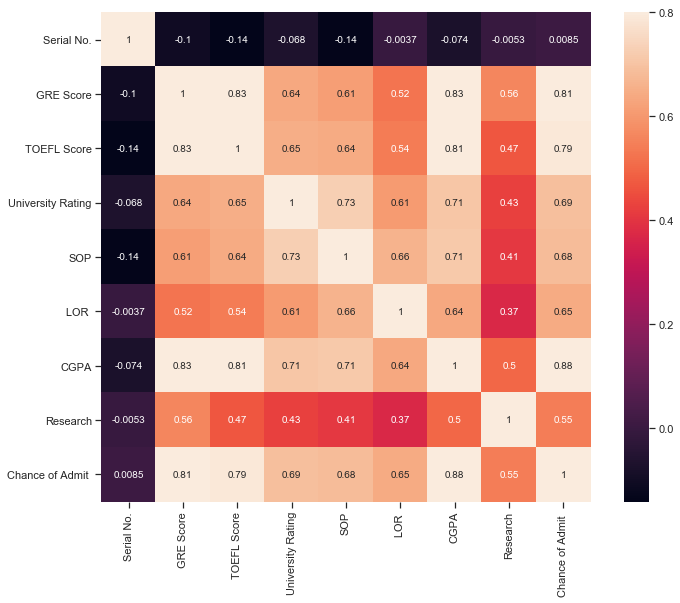

In [6]:
corrmat = data.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
corrmat

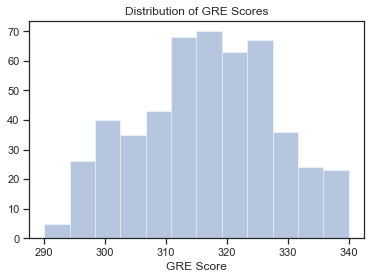

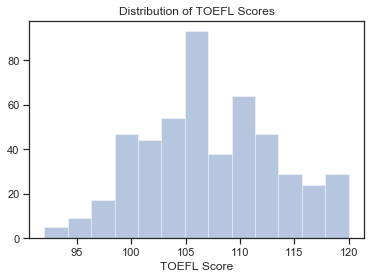

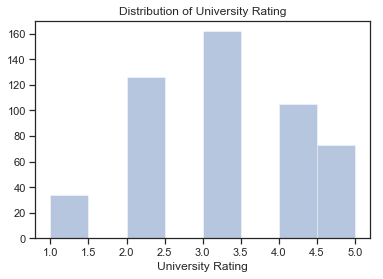

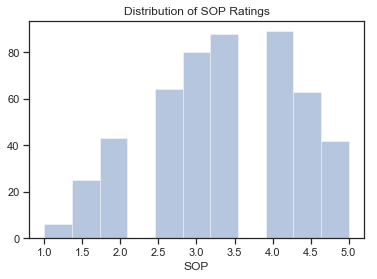

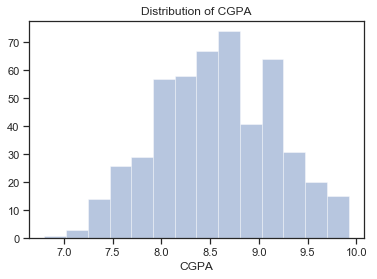

In [7]:
# Распреденение оценок за GRE
fig = sns.distplot(data['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

# Распреденение оценок за TOEFL
fig = sns.distplot(data['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

# Распреденение рейтингов университетов
fig = sns.distplot(data['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

# Распреденение рейтингов заявлений о намерениях
fig = sns.distplot(data['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

# Распреденение общих средних баллов
fig = sns.distplot(data['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

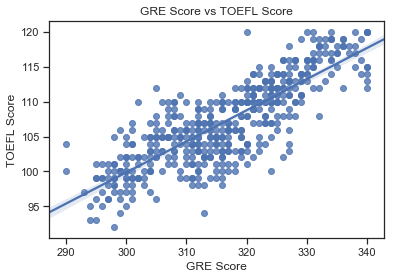

In [8]:
# Люди с высокой оценкой GRE также имеют высокую отметку по TOEFL
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=data)
plt.title("GRE Score vs TOEFL Score")
plt.show()

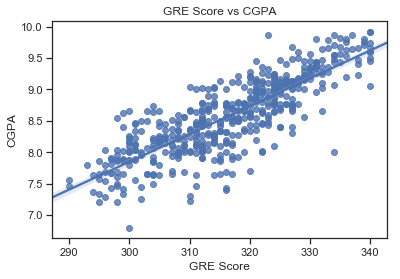

In [9]:
# Люди с более высоким CGPA обычно имеют более высокие оценки GRE
fig = sns.regplot(x="GRE Score", y="CGPA", data=data)
plt.title("GRE Score vs CGPA")
plt.show()

Not Having Research: 220
Having Research: 280


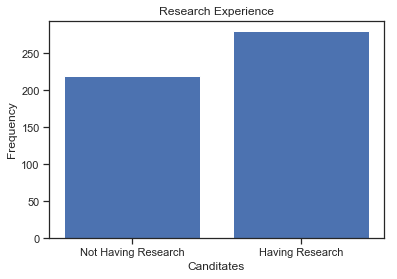

In [10]:
# У скольких людей была исследовательская работа
print("Not Having Research:",len(data[data.Research == 0]))
print("Having Research:",len(data[data.Research == 1]))
y = np.array([len(data[data.Research == 0]),len(data[data.Research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

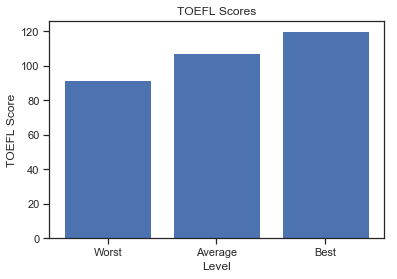

In [11]:
# Распреденение оценок за TOEFL
y = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

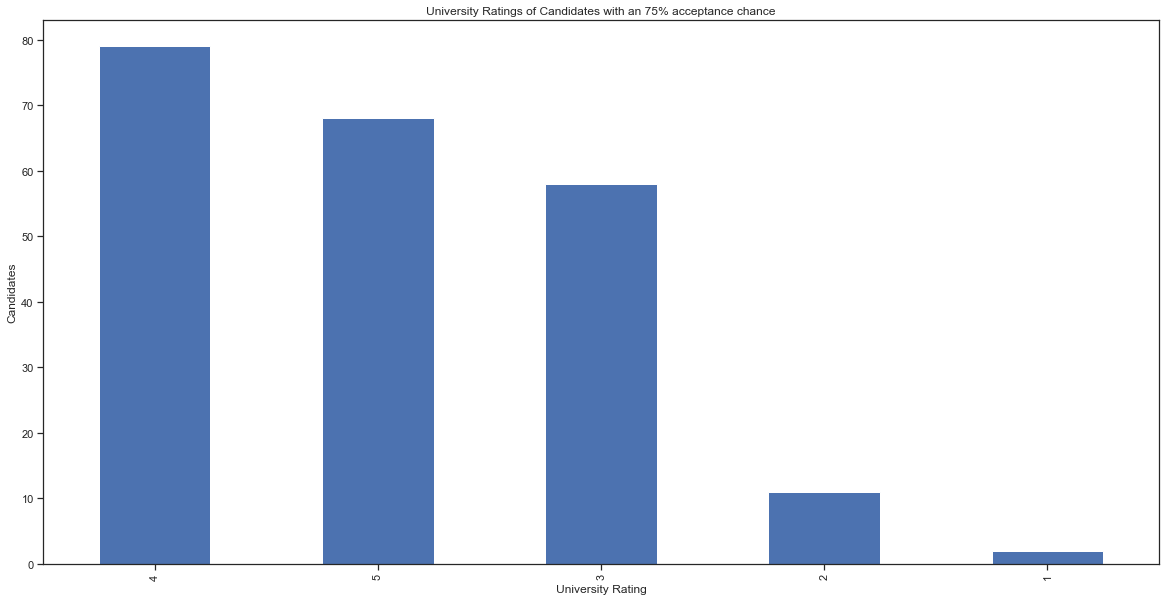

In [12]:
# Кандидатам, окончившим хорошие университеты, повезло больше
s = data[data["Chance of Admit "] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

### Метрики

Будем использовать следующие метрики:

    Средняя абсолютная ошибка;
    Медиана абсолютной ошибки;
    Объяснимая вариация.



In [13]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error

Будем использовать следующие модели:

    Дерево решений;
    Случайный лес (ансамблевая модель);
    Линейная регрессия;
    k-ближайшие соседи.

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier

In [15]:
# разделение на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X=data.drop('Chance of Admit ',axis=1)
y=data['Chance of Admit ']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
template_header = "Модель {}"
template = "Значение по метрике {}: {:.2f}"

In [18]:
class Regressor():
  def __init__(self, method, metrics, x_train, y_train, x_test, y_test):
    self._method = method
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test
    self._metrics = metrics
    self.target_1 = []
    
  def training(self):
    self._method.fit(self.x_train, self.y_train)
    self.target_1 = self._method.predict(self.x_test)
    
  def result(self):
    print(template_header.format(self._method))
    for metric in self._metrics:
      print(template.format(metric.__name__, 
                            metric(self.y_test, self.target_1)))

In [19]:
metrics = [explained_variance_score, 
                   mean_absolute_error, 
                   median_absolute_error]
models = [KNeighborsRegressor(), 
                  DecisionTreeRegressor(max_depth=3), 
                  RandomForestRegressor(n_estimators=10, max_depth=3)]

In [20]:
for model in models:
  regressor = Regressor(model, metrics, X_train, 
                        y_train, X_test, y_test)
  regressor.training()
  regressor.result()

Модель KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')
Значение по метрике explained_variance_score: 0.59
Значение по метрике mean_absolute_error: 0.07
Значение по метрике median_absolute_error: 0.05
Модель DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Значение по метрике explained_variance_score: 0.76
Значение по метрике mean_absolute_error: 0.05
Значение по метрике median_absolute_error: 0.04
Модель RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, 

### Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [21]:
# Настройка параметров
from sklearn.model_selection import ShuffleSplit
_cv = ShuffleSplit(n_splits=5, test_size=0.25)

tuned_parameters_1 = {'n_neighbors':[2,3,4,5,6,7,8,9]}
n_range = np.array(range(2,11,1))
tuned_parameters_2 = [{'max_depth': n_range}]
n_range2 = np.array(range(5, 45, 5))
tuned_parameters_3 = [{'n_estimators': n_range2, 'max_depth': n_range}]

In [22]:
# KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
rg_sgd_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters_1, cv=_cv, scoring='explained_variance')
rg_sgd_gs.fit(X_train, y_train)
rg_sgd_gs.best_params_

{'n_neighbors': 3}

In [23]:
# DecisionTreeRegressor
rg_dtr_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters_2, 
                         cv=_cv, scoring='explained_variance')
rg_dtr_gs.fit(X_train, y_train)
rg_dtr_gs.best_params_

{'max_depth': 4}

In [24]:
# RandomForestRegressor
rg_rfr_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters_3, 
                         cv=_cv, scoring='explained_variance')
rg_rfr_gs.fit(X_train, y_train)
rg_rfr_gs.best_params_

{'max_depth': 8, 'n_estimators': 35}

### Сравнение модели с произвольным и лучшим параметром K

In [25]:
optimized_models = [KNeighborsRegressor(),
                                KNeighborsRegressor(n_neighbors=4),
                                DecisionTreeRegressor(max_depth=3),
                                DecisionTreeRegressor(max_depth=5),
                                RandomForestRegressor(n_estimators=10, 
                                                      max_depth=3),
                                RandomForestRegressor(n_estimators=10, 
                                                      max_depth=40)
                               ]

In [26]:
for model in optimized_models:
  regressor = Regressor(model, metrics, X_train, 
                        y_train, X_test, y_test)
  regressor.training()
  regressor.result()
  print('-'*50)

Модель KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')
Значение по метрике explained_variance_score: 0.59
Значение по метрике mean_absolute_error: 0.07
Значение по метрике median_absolute_error: 0.05
--------------------------------------------------
Модель KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')
Значение по метрике explained_variance_score: 0.60
Значение по метрике mean_absolute_error: 0.07
Значение по метрике median_absolute_error: 0.05
--------------------------------------------------
Модель DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           

## Выводы

По полученным моделям и значениям можно сделать следующие выводы:

    Для DecisionTreeRegressor и RandomForestRegressor критично задавать оптимальные гиперпараметры, это улучшает точность на порядок;
    После подбора гиперпараметров улучшилось качество обучения
    
 